## Módulo 1

In [1]:
# features (1 sim, 0 não)
# [pelo longo?, perna curta?, faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1 , 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1 , 1]

x_train = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
# 1 -> Porco; 0 -> Cachorro
y_train = [1,1,1,0,0,0]

In [2]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [3]:
animal_misterioso = [1, 1, 1]
model.predict([animal_misterioso])

array([0])

In [4]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]
x_test = [misterio1, misterio2, misterio3]
previsoes = model.predict(x_test)

In [5]:
y_test = [0,1,1]

In [6]:
corretos = (previsoes == y_test).sum()
total = len(x_test)
acc = corretos/total
acc

0.6666666666666666

In [7]:
from sklearn.metrics import accuracy_score

taxa = accuracy_score(y_test, previsoes)

In [8]:
taxa

0.6666666666666666

## Módulo 2

In [9]:
import pandas as pd

In [10]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

In [11]:
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [12]:
x = dados[['home', 'how_it_works', 'contact']]
y = dados['bought']

In [13]:
x.head()

,home,how_it_works,contact
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [14]:
dados.shape

(99, 4)

In [15]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [16]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 24, 24)

In [17]:
model.fit(x_train, y_train)

LinearSVC()

In [18]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [19]:
round(accuracy_score(y_test, model.predict(x_test))*100, 2)

95.83

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [21]:
x_train.shape, x_test.shape

((74, 3), (25, 3))

In [22]:
SEED = 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED ,stratify = y)
model.fit(x_train, y_train)
model.predict(x_test)
round(accuracy_score(y_test, model.predict(x_test))*100, 2)

96.0

In [23]:
y_train.value_counts()

bought
0    49
1    25
Name: count, dtype: int64

In [24]:
y_test.value_counts()

bought
0    17
1     8
Name: count, dtype: int64

## Módulo 3

In [26]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [27]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados.rename(columns = a_renomear, inplace=True)

In [28]:
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [29]:
trocar = {
    0 : 1,
    1 : 0
}

In [33]:
dados.nao_finalizado = dados.nao_finalizado.map(trocar)

In [35]:
dados.rename(columns={'nao_finalizado' : 'finalizado'}, inplace=True)

In [36]:
dados.head()

,finalizado,horas_esperadas,preco
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


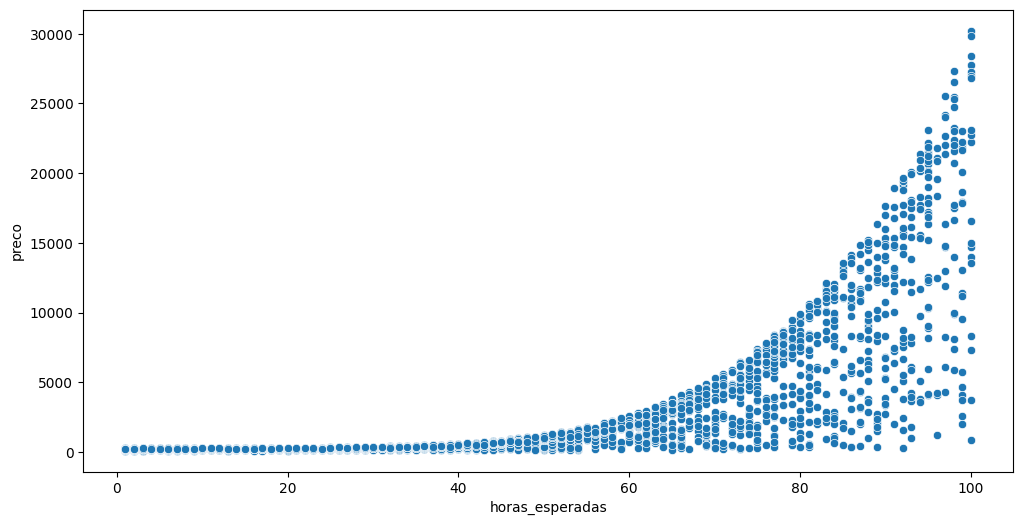

In [41]:
import seaborn as sns

ax = sns.scatterplot(data=dados, x='horas_esperadas', y='preco')
ax.figure.set_size_inches(12,6)

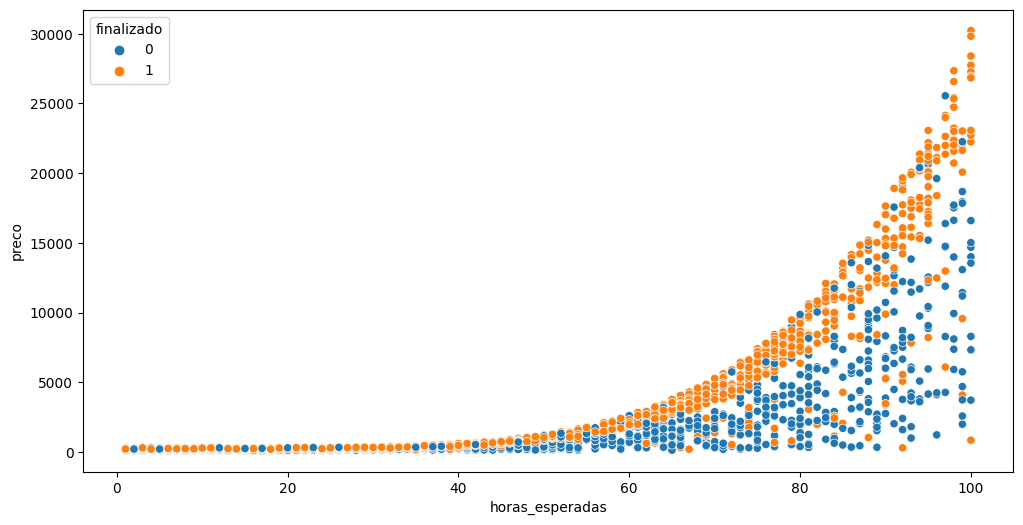

In [42]:
ax = sns.scatterplot(data=dados, x='horas_esperadas', y='preco', hue='finalizado')
ax.figure.set_size_inches(12,6)

In [46]:
dados.finalizado.sum()/len(dados)

0.5257301808066759

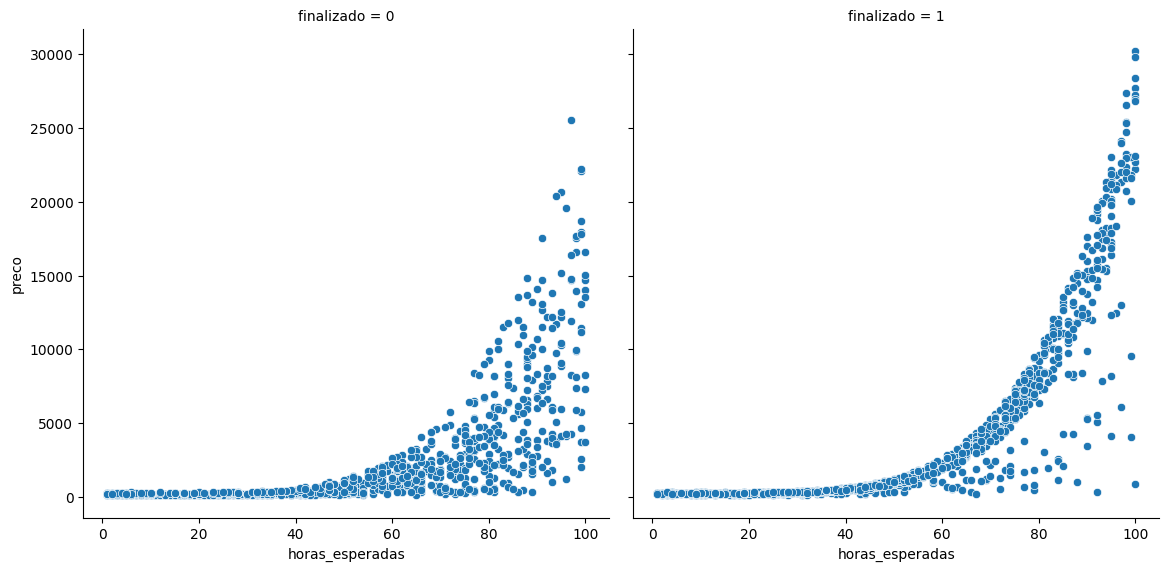

In [48]:
ax = sns.relplot(data=dados, x='horas_esperadas', y='preco', col='finalizado')
ax.figure.set_size_inches(12,6)

In [49]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [50]:
SEED = 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED ,stratify = y)
model.fit(x_train, y_train)
model.predict(x_test)
round(accuracy_score(y_test, model.predict(x_test))*100, 2)

C:\Users\pedro\anaconda3\envs\drenagem-mm\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


60.93

In [52]:
y_train.value_counts()

finalizado
1    850
0    767
Name: count, dtype: int64

In [53]:
y_test.value_counts()

finalizado
1    284
0    256
Name: count, dtype: int64

In [54]:
len(y_test)

540

In [57]:
import numpy as np
previsoes_de_base = np.ones(540)
acc_base = accuracy_score(y_test, previsoes_de_base)
round(acc_base*100, 2)

52.59

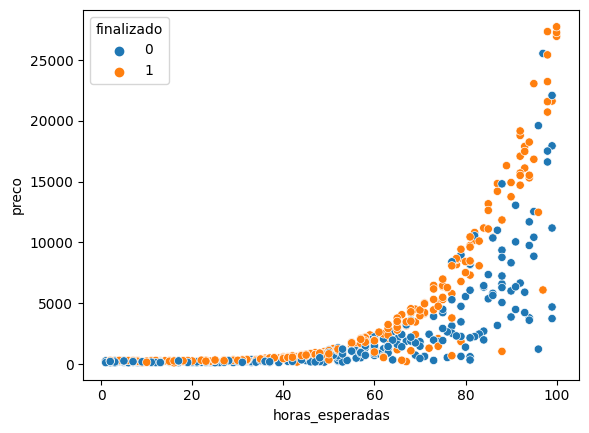

In [58]:
ax = sns.scatterplot(data=x_test, x='horas_esperadas', y='preco', hue=y_test)

In [59]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()

In [66]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [68]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [71]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

C:\Users\pedro\anaconda3\envs\drenagem-mm\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [72]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)